In [1]:
import seaborn as sns
#import scipy
#import sklearn
import pandas as pd
#import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
def average_time(times):
    
    total_secs = 0
    n = 0
    for time in times:
        h, m, s = time.split(':')
        secs = float(s) + float(m)*60 + float(h)*3600
        total_secs += secs
        n += 1
    
    avg_time = round(total_secs / n, 2)
    hours, rem = divmod(avg_time, 3600)
    minutes, seconds = divmod(rem, 60)
    executionTimeFormated = '{:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds)
    
    return executionTimeFormated

In [3]:
def analyseResults(functionName):
    
    
    print('----------------------------------------------------------')
    
    basicGPresultsPath = '../results/GP/basicGP/' + functionName + '.csv'
    dfBasicGP = pd.read_csv(basicGPresultsPath)
    
    print("Basic GP result analysis:")
    print()
    print("Mean R2 score on train data:", dfBasicGP["TrainR2Score"].mean())
    print("Mean R2 score on test data:", dfBasicGP["TestR2Score"].mean())
    
    maxTestScoreRowIdxBasicGP = dfBasicGP["TestR2Score"].idxmax()
    bestResultRowBasicGP = dfBasicGP.iloc[[maxTestScoreRowIdxBasicGP]]
    #print(bestResultRowBasicGP)
    print('Max R2 score on test data is {0} for individual {1}, simplified to {2}'.format(bestResultRowBasicGP.iloc[0]['TestR2Score'], bestResultRowBasicGP.iloc[0]['BestIndividual'], bestResultRowBasicGP.iloc[0]['BestIndividualSimplified']))
    
    if 'SympyEquivalence' in dfBasicGP.columns:
        print('Symbolical equivalence with target function:', bestResultRowBasicGP.iloc[0]['SympyEquivalence'])
        numOfSymEquivalences = 0
        if dfBasicGP['SympyEquivalence'].any():
            numOfSymEquivalences = dfBasicGP['SympyEquivalence'].value_counts()[True]
        print('Number of runs in which symbolical equivalence was achived:', numOfSymEquivalences)
    
    avg_time = average_time(dfBasicGP["Time"])
    print("Average time: ", avg_time)
    
    print('----------------------------------------------------------')
    print()
    
    
    sscGPresultsPath = '../results/GP/SSC/' + functionName + '.csv'
    dfSSCGP = pd.read_csv(sscGPresultsPath)
    
    print("GP with Semantic Similarity-based Crossover result analysis:")
    print()
    print("Mean R2 score on train data:", dfSSCGP["TrainR2Score"].mean())
    print("Mean R2 score on test data:", dfSSCGP["TestR2Score"].mean())
    
    maxTestScoreRowIdxSSCGP = dfSSCGP["TestR2Score"].idxmax()
    bestResultRowSSCGP = dfSSCGP.iloc[[maxTestScoreRowIdxSSCGP]]
    #print(bestResultRowBasicGP)
    print('Max R2 score on test data is {0} for individual {1}, simplified to {2}'.format(bestResultRowSSCGP.iloc[0]['TestR2Score'], bestResultRowSSCGP.iloc[0]['BestIndividual'], bestResultRowSSCGP.iloc[0]['BestIndividualSimplified']))
    
    if 'SympyEquivalence' in dfSSCGP.columns:
        print('Symbolical equivalence with target function:', bestResultRowSSCGP.iloc[0]['SympyEquivalence'])
        numOfSymEquivalences = 0
        if dfSSCGP['SympyEquivalence'].any():
            numOfSymEquivalences = dfSSCGP['SympyEquivalence'].value_counts()[True]
        print('Number of runs in which symbolical equivalence was achived:', numOfSymEquivalences)
        
        
    avg_time = average_time(dfSSCGP["Time"])
    print("Average time: ", avg_time)
    
    print('----------------------------------------------------------')
    print()
    
    
    vnpResultsPath = '../results/VNP/' + functionName + '.csv'
    dfVNP = pd.read_csv(vnpResultsPath)
    
    print("VNP result analysis:")
    print()
    print("Mean R2 score on train data:", dfVNP["TrainR2Score"].mean())
    print("Mean R2 score on test data:", dfVNP["TestR2Score"].mean())
    
    maxTestScoreRowIdxVNP = dfVNP["TestR2Score"].idxmax()
    bestResultRowVNP = dfVNP.iloc[[maxTestScoreRowIdxVNP]]
    #print(bestResultRowBasicGP)
    print('Max R2 score on test data is {0} for individual {1}, simplified to {2}'.format(bestResultRowVNP.iloc[0]['TestR2Score'], bestResultRowVNP.iloc[0]['BestSolution'], bestResultRowVNP.iloc[0]['BestSolutionSimplified']))
    
    if 'SympyEquivalence' in dfVNP.columns:
        print('Symbolical equivalence with target function:', bestResultRowVNP.iloc[0]['SympyEquivalence'])
        numOfSymEquivalences = 0
        if dfVNP['SympyEquivalence'].any():
            numOfSymEquivalences = dfVNP['SympyEquivalence'].value_counts()[True]
        print('Number of runs in which symbolical equivalence was achived:', numOfSymEquivalences)
        
    avg_time = average_time(dfVNP["Time"])
    print("Average time: ", avg_time)
    
    print('----------------------------------------------------------')
    print()
    

    
    mergedData = []
    
    for index, row in dfBasicGP.iterrows():
        mergedData.append([row['TrainR2Score'], 'train', 'basicGP'])
        mergedData.append([row['TestR2Score'], 'test', 'basicGP'])
        
    for index, row in dfSSCGP.iterrows():
        mergedData.append([row['TrainR2Score'], 'train', 'sscGP'])
        mergedData.append([row['TestR2Score'], 'test', 'sscGP'])
        
    for index, row in dfVNP.iterrows():
        mergedData.append([row['TrainR2Score'], 'train', 'VNP'])
        mergedData.append([row['TestR2Score'], 'test', 'VNP'])
        
    #for row in mergedData:
        #print(row)
        
    dfMerged = pd.DataFrame(mergedData, columns = ['r2_score', 'datasetType', 'metaheuristicType'])
        
    #sns.set(rc={'figure.figsize':(7,5)})
    ax = sns.boxplot(x="metaheuristicType", y="r2_score", hue="datasetType", data=dfMerged, palette="Set3")
    plt.savefig('boxplots/'+ functionName +'.png')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.9141515931401908
Mean R2 score on test data: 0.9074026921847483
Max R2 score on test data is 0.992114015750541 for individual ((x0 / cos(x0)) + (x0 * x0)), simplified to x0*(x0 + 1/cos(x0))
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:15.65
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.8613699379333387
Mean R2 score on test data: 0.8272721554239374
Max R2 score on test data is 0.984988260834925 for individual ((x0 + (x0 * x0)) / (cos(x0)**(cos(x0)))), simplified to x0*(x0 + 1)/cos(x0)**cos(x0)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:24.98
------------------------------------------------

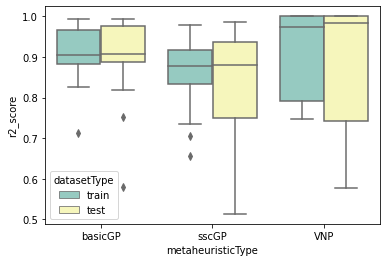

In [4]:
analyseResults('f1')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.8266418455423321
Mean R2 score on test data: 0.8239778016366326
Max R2 score on test data is 0.994417646821789 for individual ((x0 + (x0 * x0)) / cos(sin((sin(x0) / cos(x0))))), simplified to x0*(x0 + 1)/cos(sin(tan(x0)))
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:13.89
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.7991429496033916
Mean R2 score on test data: 0.7976483082966594
Max R2 score on test data is 0.98097936019374 for individual (((x0 / x0) + sin(x0)) * (x0 + (x0 * x0))), simplified to x0*(x0 + 1)*(sin(x0) + 1)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:26.05
-------------------

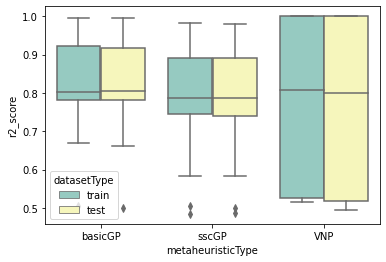

In [5]:
analyseResults('f2')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.8506114871025913
Mean R2 score on test data: 0.6945540158553251
Max R2 score on test data is 0.980890739944617 for individual ((x0 / ((cos(x0) / cos(0.542))**(x0))) / ((x0 / ((x0 / 0.235) - sin(x0)))**(x0))), simplified to X0/((1.16729*cos(x0))**x0*(x0/(4.2553*x0 - sin(x0)))**x0)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:20.80
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.8506298562819316
Mean R2 score on test data: -1.4287720436082727
Max R2 score on test data is 0.994547541673513 for individual (sin(x0) + (x0 * (((x0 * x0) + x0) / sin(cos(x0))))), simplified to (x0**3 + x0**2 + sin(x0)*sin(cos(x0)))/sin(cos(x0))
Symbolical equivalence with target function: False
Number of r

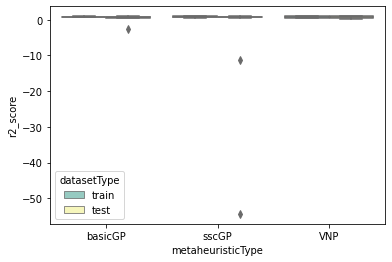

In [6]:
analyseResults('f3')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.746318453891946
Mean R2 score on test data: 0.795872061535691
Max R2 score on test data is 0.985984681416326 for individual (x0 / (cos(log(0.302))**((x0 / cos(x0))))), simplified to 2.74087**(x0/cos(x0))*x0
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:14.02
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.6911031684739691
Mean R2 score on test data: 0.7433290645816991
Max R2 score on test data is 0.959551847816302 for individual (((-0.501 / -0.182)**(sin(x0))) * ((x0 * x0) - (x0 / -0.923))), simplified to 2.75274725274725**sin(x0)*x0*(x0 + 1.08342361863489)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:

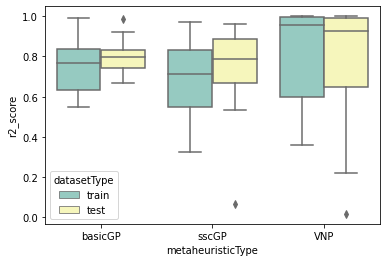

In [7]:
analyseResults('f4')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.6431833357943356
Mean R2 score on test data: 0.6071726906099015
Max R2 score on test data is 0.943501766317329 for individual (log(cos(0.925)) / sin((0.482 + (x0 * x0)))), simplified to -0.507772634912581/sin(x0**2 + 0.482)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:14.18
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.6060348539823903
Mean R2 score on test data: 0.5886109224953867
Max R2 score on test data is 0.963713188757514 for individual (log((cos(0.996)**(cos(0.996)))) + log(cos(cos(x0)))), simplified to log(cos(cos(x0))) - 0.331321874161918
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00

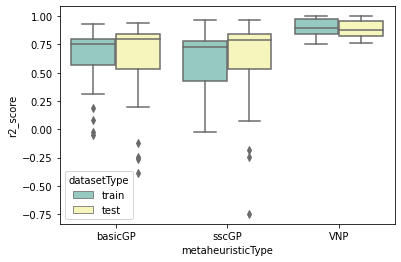

In [8]:
analyseResults('f5')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.9279120200166845
Mean R2 score on test data: 0.8833895787171407
Max R2 score on test data is 0.970670070090676 for individual (x0 / cos(cos((x0 + -0.52)))), simplified to x0/cos(cos(x0 - 0.52))
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:13.53
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.9170027990334023
Mean R2 score on test data: 0.8814683515605797
Max R2 score on test data is 0.987093535596115 for individual ((log(cos(log(0.575))) * (((x0 - x0)**((x0 - x0))) * sin((x0 - x0)))) + ((((x0 / -0.098) * cos(x0)) * sin(sin(-0.25))) + sin(((x0 * x0) * cos(x0))))), simplified to 2.49885502320634*x0*cos(x0) + sin(x0**2*cos(x0))
Symbolical equivalence with target function: False
Numbe

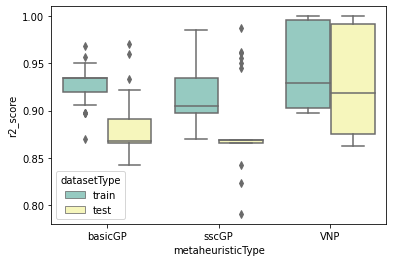

In [10]:
analyseResults('f6')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.959678422538356
Mean R2 score on test data: 0.9500241358356489
Max R2 score on test data is 0.997390646594376 for individual (x0 + ((x0 * 0.359)**((x0 / x0)))), simplified to 1.359*x0
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:18.37
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.9679834285069145
Mean R2 score on test data: 0.9587007101746468
Max R2 score on test data is 0.998174906660281 for individual (x0 / sin(0.81)), simplified to 1.38066782815756*x0
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:51.65
----------------------------------------------------------

VNP result analysis:

Mean R

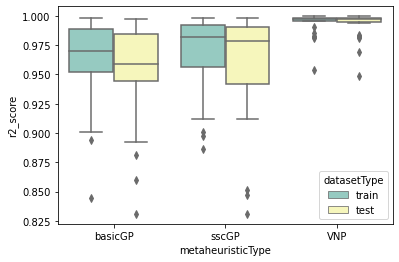

In [11]:
analyseResults('f7')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.857160126502155
Mean R2 score on test data: 0.7159485160505177
Max R2 score on test data is 0.999354891162691 for individual (sin(x0) + (x1 * sin(x1))), simplified to x1*sin(x1) + sin(x0)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:13.34
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.8367063026559046
Mean R2 score on test data: 0.6577938624933163
Max R2 score on test data is 0.994378854273945 for individual ((sin(x0) + (x1 * x0)) - ((x0 - x1) * sin(x1))), simplified to x0*x1 + (-x0 + x1)*sin(x1) + sin(x0)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:00:35.03
------------------------------------

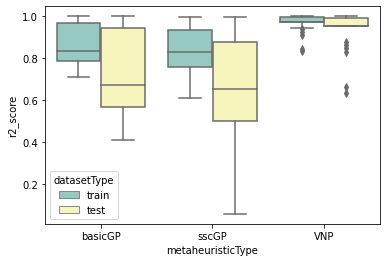

In [12]:
analyseResults('f8')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.9497057072084766
Mean R2 score on test data: 0.9547554275419928
Max R2 score on test data is 1.0 for individual (cos(x1) * (sin(x0) + sin(x0))), simplified to 2*sin(x0)*cos(x1)
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 1
Average time:  00:00:12.17
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.9401102068547345
Mean R2 score on test data: 0.9382008069416367
Max R2 score on test data is 1.0 for individual (cos(x1) * (sin(x0) + sin(x0))), simplified to 2*sin(x0)*cos(x1)
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 1
Average time:  00:00:28.44
----------------------------------------------------------

VNP result analysis:

Mean R2 score on

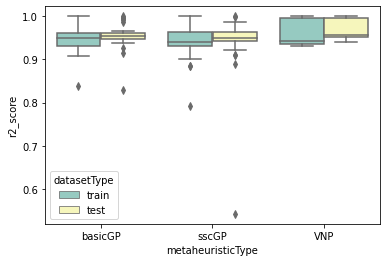

In [13]:
analyseResults('f9')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.8785349165823936
Mean R2 score on test data: 0.8979987273120948
Max R2 score on test data is 1.0 for individual ((x0 * x1) + x1), simplified to x1*(x0 + 1)
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 7
Average time:  00:00:12.52
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.8312284306790263
Mean R2 score on test data: 0.8613588155773771
Max R2 score on test data is 1.0 for individual ((x1 * x0) + ((x0 * x1) / x0)), simplified to x1*(x0 + 1)
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 3
Average time:  00:00:19.88
----------------------------------------------------------

VNP result analysis:

Mean R2 score on train data: 0.9487001819263

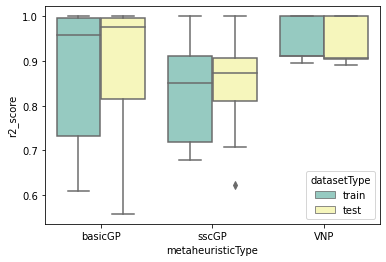

In [14]:
analyseResults('f01')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.7654835039867149
Mean R2 score on test data: 0.7914248600689872
Max R2 score on test data is 1.0 for individual ((x1 + x0) + (x1 * x1)), simplified to x0 + x1**2 + x1
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 1
Average time:  00:00:07.76
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.8016172769241449
Mean R2 score on test data: 0.8181649492462327
Max R2 score on test data is 1.0 for individual (x1 + (x0 + (x1 * x1))), simplified to x0 + x1**2 + x1
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 3
Average time:  00:00:13.00
----------------------------------------------------------

VNP result analysis:

Mean R2 score on train data: 0.84827

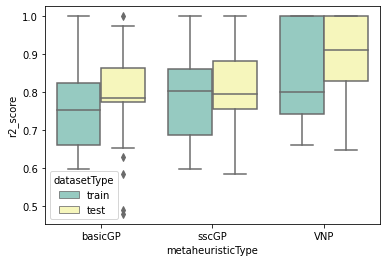

In [15]:
analyseResults('f02')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.7454161722597625
Mean R2 score on test data: 0.8100762203162168
Max R2 score on test data is 1.0 for individual ((x1 * x0) + cos(x0)), simplified to x0*x1 + cos(x0)
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 5
Average time:  00:00:06.33
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.733289408185515
Mean R2 score on test data: 0.820537513703584
Max R2 score on test data is 1.0 for individual ((x1 * x0) + cos(x0)), simplified to x0*x1 + cos(x0)
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 5
Average time:  00:00:12.55
----------------------------------------------------------

VNP result analysis:

Mean R2 score on train data: 0.86334105002

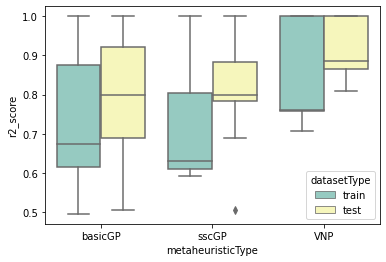

In [16]:
analyseResults('f03')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.7725436309875519
Mean R2 score on test data: 0.8206653264442988
Max R2 score on test data is 1.0 for individual (x0 - (x1 * x1)), simplified to x0 - x1**2
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 2
Average time:  00:00:12.34
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.7395734978729755
Mean R2 score on test data: 0.7752547629992883
Max R2 score on test data is 1.0 for individual (x0 - (x1 * x1)), simplified to x0 - x1**2
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 1
Average time:  00:00:18.13
----------------------------------------------------------

VNP result analysis:

Mean R2 score on train data: 0.9138543368388198
Mean R2 scor

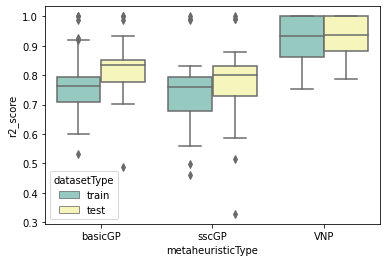

In [17]:
analyseResults('f04')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.7946633882544258
Mean R2 score on test data: 0.797239674270462
Max R2 score on test data is 1.0 for individual ((x1 + x0) - (x1 * x1)), simplified to x0 - x1**2 + x1
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 3
Average time:  00:00:07.20
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.7704904629986866
Mean R2 score on test data: 0.7654412768317578
Max R2 score on test data is 1.0 for individual ((x0 + x1) - (x1 * x1)), simplified to x0 - x1**2 + x1
Symbolical equivalence with target function: True
Number of runs in which symbolical equivalence was achived: 1
Average time:  00:00:18.43
----------------------------------------------------------

VNP result analysis:

Mean R2 score on train data: 0.846113

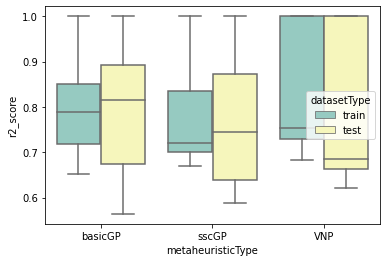

In [20]:
analyseResults('f05')

----------------------------------------------------------
Basic GP result analysis:

Mean R2 score on train data: 0.23791100841291796
Mean R2 score on test data: 0.26405557635569044
Max R2 score on test data is 0.9292544378885744 for individual (sin(sin(0.585))**((x5 / log(0.777)))), simplified to 1.90635601565208**(3.96330096475541*x5)
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:03:03.80
----------------------------------------------------------

GP with Semantic Similarity-based Crossover result analysis:

Mean R2 score on train data: 0.2130339640682002
Mean R2 score on test data: 0.23310319778488475
Max R2 score on test data is 0.7923647003459856 for individual (0.822 / (0.052**(x5))), simplified to 0.822*19.2307692307692**x5
Symbolical equivalence with target function: False
Number of runs in which symbolical equivalence was achived: 0
Average time:  00:04:07.58
---------------------------------

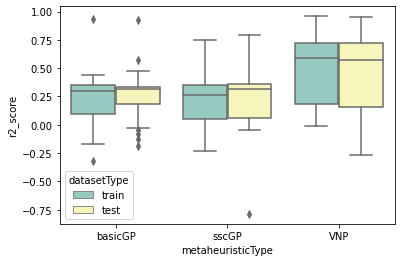

In [7]:
analyseResults('yacht_hydrodynamics')